In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

import pickle

0 - target not found
1 - target found
2 - undecided target (need human help)


no_target
found
undecided

In [28]:
data = pd.DataFrame({
    'person': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    'car': [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    'bus': [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    'truck': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'target_status': ["no_target", "undecided", "undecided", "found", "undecided", "found", "found", "found", "found", "found", "found", "found", "found", "found", "found", "found"]
})

data

,person,car,bus,truck,target_status
0,0,0,0,0,no_target
1,0,0,0,1,undecided
2,0,0,1,0,undecided
3,0,0,1,1,found
4,0,1,0,0,undecided
5,0,1,0,1,found
6,0,1,1,0,found
7,0,1,1,1,found
8,1,0,0,0,found
9,1,0,0,1,found


In [29]:
for i in range(6):
    data = pd.concat([data, data], ignore_index=True)
data

,person,car,bus,truck,target_status
0,0,0,0,0,no_target
1,0,0,0,1,undecided
2,0,0,1,0,undecided
3,0,0,1,1,found
4,0,1,0,0,undecided
...,...,...,...,...,...
1019,1,0,1,1,found
1020,1,1,0,0,found
1021,1,1,0,1,found
1022,1,1,1,0,found


In [30]:
data["target_status"].replace({"no_target": 0, "found": 1, "undecided": 2}, inplace=True)

/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_68746/2957721159.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["target_status"].replace({"no_target": 0, "found": 1, "undecided": 2}, inplace=True)
/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_68746/2957721159.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_op

In [31]:
data

,person,car,bus,truck,target_status
0,0,0,0,0,0
1,0,0,0,1,2
2,0,0,1,0,2
3,0,0,1,1,1
4,0,1,0,0,2
...,...,...,...,...,...
1019,1,0,1,1,1
1020,1,1,0,0,1
1021,1,1,0,1,1
1022,1,1,1,0,1


In [32]:
x = data.drop("target_status", axis="columns")
y = data["target_status"]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [34]:
model = Sequential([
    Dense(6, input_shape = (4, ), activation="relu"),
    Dense(8, activation="relu"),
    Dense(5, activation="relu"),
    Dense(7, activation="relu"),
    Dense(4, activation="relu"),
    Dense(3, activation="softmax"),

])


model.compile(
    optimizer = "SGD",
    loss = "sparse_categorical_crossentropy",
    metrics = (["accuracy"]),
)


/Users/maxkucher/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# history = model.fit(x_train, y_train, epochs=100, verbose=0)

# loss = history.history["loss"]
# epochs = range(1, len(loss)+1)

# plt.plot(epochs, loss, "r", label="Losses")
# plt.title("Loss/Epochs corelation")
# plt.xlabel('Epochs')
# plt.ylabel('Losses')
# plt.legend()
# plt.show()

In [36]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.5842 - loss: 1.1059
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.6979 - loss: 1.0129
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.6714 - loss: 0.9504
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.7623 - loss: 0.8826
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.7376 - loss: 0.8476
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.7402 - loss: 0.8107
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.7615 - loss: 0.7587
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.7386 - loss: 0.7592
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.7376 - loss: 0.7432
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.7295 - loss: 0.7320
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.7504 - loss: 0.6968
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step

In [37]:
model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 1.0000 - loss: 0.0109


[0.012050863355398178, 1.0]

In [38]:
list_for_res = []
preds = model.predict(x_test)
for pred in preds:
    res = np.argmax(pred)
    list_for_res.append(res)

list_for_res = np.array(list_for_res)
print(list_for_res)



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 0 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 2
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 1 2 1 1 1 1 1 0 2 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 2 1 1 1 2 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 2
 1 1 1 0 1 0 1 1 1 1 0 1 1 1 2 1 1 2 2 1]


In [39]:
y_test = np.array(y_test)

In [40]:
corelation = pd.DataFrame({"Predictions:": list_for_res.squeeze(), "Actuals": y_test.squeeze()})
corelation

,Predictions:,Actuals
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
200,1,1
201,1,1
202,2,2
203,2,2


In [41]:
test_array = np.array([0, 0, 0, 0])
test_array = test_array.reshape(1, -1)
np.argmax(model.predict(test_array))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


0

In [42]:
cm = confusion_matrix(y_test, list_for_res)
cm

array([[ 11,   0,   0],
       [  0, 160,   0],
       [  0,   0,  34]])

Text(95.72222222222221, 0.5, 'Actual')

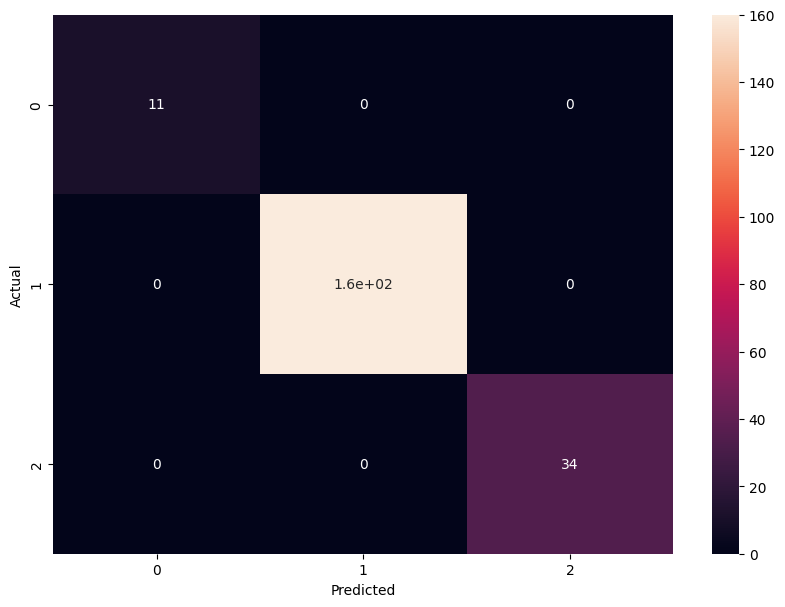

In [43]:
import seaborn as sn 
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [44]:
with open("analyzer_nn.pickle", "wb") as file:
        pickle.dump(model, file)